In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

fla = pd.read_csv('Florida_2.csv')
fla.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BorrID,LoanStatus,GrossApproval,SBAGuaranteed,InterestRate,...,NaicsCode,NaicsDescription,JobsSupported,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,Hayes Environmental Consulting,701 Hummingbird Street,Lynn Haven,FL,32444,541,CHGOFF,25000,21250,8.00,...,541330,Engineering Services,1,COMM EXPRS,Community Express,Umpqua Bank,"445 SE Main St, First Fl",ROSEBURG,OR,97470
1,Around the Clock Fitness,1242 SW Pine Island.,Cape coral,FL,33991,8127,PIF,521800,469620,6.00,...,713990,All Other Amusement and Recreation Industries,20,PLP,Guaranty,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042
2,"Integrated Metering Systems, I","11701 South Belcher Road, Sui",Largo,FL,33773,4025,PIF,40800,34680,6.00,...,335311,"Power, Distribution, and Specialty Transformer...",23,PLP,Guaranty,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901
3,Loving Enterprises Inc and 2 P,7885 Boca Ciega Drive,SAINT PETERSBURG,FL,33706,7228,PIF,332000,249000,5.50,...,453220,"Gift, Novelty, and Souvenir Stores",21,PLP,Guaranty,"PNC Bank, National Association",222 Delaware Ave,WILMINGTON,DE,19801
4,Lawrence J. Roberts & Associat,249 Catalonia Avenue.,Coral gables,FL,33134,1508,EXEMPT,225000,112500,5.95,...,541110,Offices of Lawyers,3,SBA EXPRES,FA$TRK (Small Loan Express),TotalBank,100 SE 2nd St,MIAMI,FL,33131


In [3]:
fla = fla.dropna()

In [4]:
X = fla[["LoanStatus", "GrossApproval", "SBAGuaranteed"]]
y = fla["COAmount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(573, 3) (573, 1)


In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["LoanStatus"])
data_binary_encoded.head()

,GrossApproval,SBAGuaranteed,LoanStatus_CHGOFF
0,25000,21250,1
26,55200,27600,1
27,35000,17500,1
28,25000,12500,1
29,40000,20000,1


In [6]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=59)

X_train.head()

,GrossApproval,SBAGuaranteed,LoanStatus_CHGOFF
12789,100000,50000,1
174,29700,14850,1
10919,15000,7500,1
262,20000,18000,1
76,100000,50000,1


In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["SBAGuaranteed"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["SBAGuaranteed"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

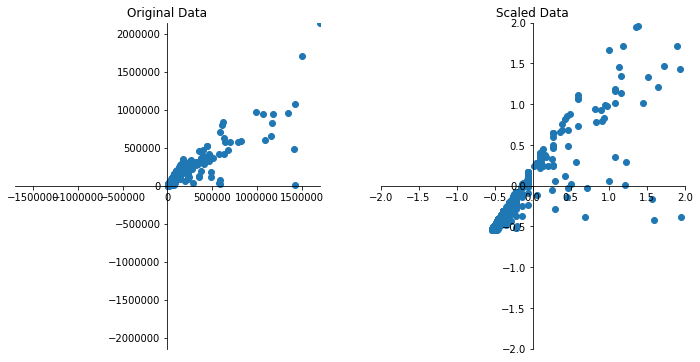

In [10]:
plt.show()

In [11]:
fla.corr()

,BorrZip,BorrID,GrossApproval,SBAGuaranteed,InterestRate,TermMonths,ApprovalFiscalYear,Days2Funded,Status,COFiscalYear,COAmount,PrinBalanceCollected,DaysRemainingAtCO,MonthsRemainingAtCO,NaicsCode,JobsSupported,BankZip
BorrZip,1.000000,0.009383,0.029230,0.038305,-0.065640,-0.016162,-0.034367,0.022205,NaN,-0.006170,0.005783,0.051423,-0.026106,-0.026051,-0.002731,-0.014756,-0.064498
BorrID,0.009383,1.000000,-0.127723,-0.106339,0.244154,0.110826,-0.627309,-0.023964,NaN,-0.966519,-0.112821,-0.103260,0.240572,0.241024,-0.045739,-0.095262,0.232777
GrossApproval,0.029230,-0.127723,1.000000,0.993218,-0.412428,0.438803,-0.016037,0.144903,NaN,0.152206,0.896864,0.789683,0.288091,0.287894,0.036391,0.311506,-0.263588
SBAGuaranteed,0.038305,-0.106339,0.993218,1.000000,-0.406299,0.465906,-0.037273,0.159698,NaN,0.133184,0.886820,0.789822,0.309760,0.309614,0.039719,0.308767,-0.246490
InterestRate,-0.065640,0.244154,-0.412428,-0.406299,1.000000,-0.209409,-0.171622,-0.140259,NaN,-0.241480,-0.382871,-0.307683,-0.140357,-0.140084,-0.082346,-0.168544,0.236852
TermMonths,-0.016162,0.110826,0.438803,0.465906,-0.209409,1.000000,0.076478,0.072991,NaN,-0.113977,0.339049,0.422108,0.924646,0.924664,0.105585,0.059382,0.100781
ApprovalFiscalYear,-0.034367,-0.627309,-0.016037,-0.037273,-0.171622,0.076478,1.000000,-0.113297,NaN,0.607816,0.024295,-0.066313,0.237715,0.237181,0.118169,-0.002238,-0.163984
Days2Funded,0.022205,-0.023964,0.144903,0.159698,-0.140259,0.072991,-0.113297,1.000000,NaN,0.058877,0.118254,0.130662,0.020069,0.020012,0.013306,0.012847,-0.180293
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COFiscalYear,-0.006170,-0.966519,0.152206,0.133184,-0.241480,-0.113977,0.607816,0.058877,NaN,1.000000,0.138162,0.117901,-0.255837,-0.256288,0.046355,0.106368,-0.273249


In [12]:
X = pd.get_dummies(fla[["GrossApproval", "SBAGuaranteed", "LoanStatus"]])
y = fla["COAmount"].values.reshape(-1, 1)
X.head()

,GrossApproval,SBAGuaranteed,LoanStatus_CHGOFF
0,25000,21250,1
26,55200,27600,1
27,35000,17500,1
28,25000,12500,1
29,40000,20000,1


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

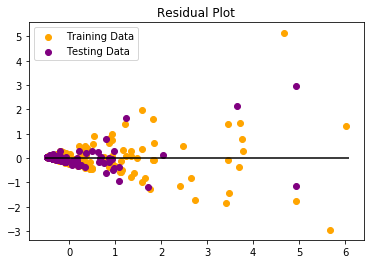

In [15]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="orange", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1587988505172438, R2: 0.7488460489006828
